# Section 5.3: Improving model fit

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

model = keras.Sequential([
    layers.Dense(512, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])
model.compile(optimizer = keras.optimizers.RMSprop(1.0),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(train_images, 
         train_labels,
         batch_size = 128,
         epochs = 10,
         validation_split = 0.2
        )

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 9s 196us/sample - loss: 771.6249 - accuracy: 0.4936 - val_loss: 2.0173 - val_accuracy: 0.2594
Epoch 2/10
48000/48000 [==============================] - 9s 183us/sample - loss: 6.5062 - accuracy: 0.2846 - val_loss: 2.5842 - val_accuracy: 0.3086
Epoch 3/10
48000/48000 [==============================] - 8s 175us/sample - loss: 3.0474 - accuracy: 0.2820 - val_loss: 2.3071 - val_accuracy: 0.2665
Epoch 4/10
48000/48000 [==============================] - 8s 176us/sample - loss: 2.6504 - accuracy: 0.3013 - val_loss: 2.4102 - val_accuracy: 0.2514
Epoch 5/10
48000/48000 [==============================] - 8s 175us/sample - loss: 3.1580 - accuracy: 0.2584 - val_loss: 2.3667 - val_accuracy: 0.3142
Epoch 6/10
48000/48000 [==============================] - 9s 177us/sample - loss: 2.6086 - accuracy: 0.2774 - val_loss: 2.2618 - val_accuracy: 0.2342
Epoch 7/10
48000/48000 [========================

Fitting the model with a big learning rate makes it hard to converge, the validation loss cannot be lower than 0.25 -> try fitting model with a lower learning rate (0.01)

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])
model.compile(optimizer = keras.optimizers.RMSprop(0.01),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(train_images, 
         train_labels,
         batch_size = 128,
         epochs = 10,
         validation_split = 0.2
        )

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 9s 191us/sample - loss: 0.3847 - accuracy: 0.9110 - val_loss: 0.1840 - val_accuracy: 0.9494
Epoch 2/10
48000/48000 [==============================] - 8s 176us/sample - loss: 0.1489 - accuracy: 0.9625 - val_loss: 0.1826 - val_accuracy: 0.9578
Epoch 3/10
48000/48000 [==============================] - 9s 181us/sample - loss: 0.1208 - accuracy: 0.9720 - val_loss: 0.1779 - val_accuracy: 0.9686
Epoch 4/10
48000/48000 [==============================] - 8s 177us/sample - loss: 0.1036 - accuracy: 0.9778 - val_loss: 0.1782 - val_accuracy: 0.9693
Epoch 5/10
48000/48000 [==============================] - 8s 176us/sample - loss: 0.0901 - accuracy: 0.9814 - val_loss: 0.1850 - val_accuracy: 0.9745
Epoch 6/10
48000/48000 [==============================] - 8s 176us/sample - loss: 0.0749 - accuracy: 0.9845 - val_loss: 0.2282 - val_accuracy: 0.9713
Epoch 7/10
48000/48000 [==========================

The model now is able to train!

In [16]:
model = keras.Sequential([layers.Dense(10, activation = 'softmax')])
model.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_images, 
                     train_labels,
                     batch_size = 128,
                     epochs = 20,
                     validation_split = 0.2
                    )

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 52us/sample - loss: 0.6882 - accuracy: 0.8296 - val_loss: 0.3619 - val_accuracy: 0.9026
Epoch 2/20
48000/48000 [==============================] - 2s 42us/sample - loss: 0.3526 - accuracy: 0.9034 - val_loss: 0.3105 - val_accuracy: 0.9134
Epoch 3/20
48000/48000 [==============================] - 2s 41us/sample - loss: 0.3159 - accuracy: 0.9121 - val_loss: 0.2923 - val_accuracy: 0.9169
Epoch 4/20
48000/48000 [==============================] - 2s 41us/sample - loss: 0.2993 - accuracy: 0.9161 - val_loss: 0.2830 - val_accuracy: 0.9227
Epoch 5/20
48000/48000 [==============================] - 2s 44us/sample - loss: 0.2897 - accuracy: 0.9189 - val_loss: 0.2754 - val_accuracy: 0.9236
Epoch 6/20
48000/48000 [==============================] - 2s 43us/sample - loss: 0.2830 - accuracy: 0.9205 - val_loss: 0.2733 - val_accuracy: 0.9252
Epoch 7/20
48000/48000 [==============================] 

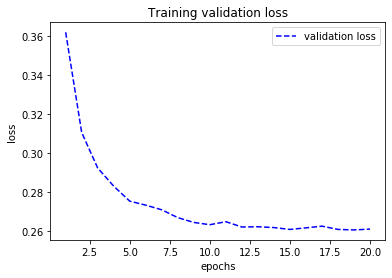

In [17]:
import matplotlib.pyplot as plt
validation_loss = history.history['val_loss']
epochs = range(1, len(validation_loss) + 1)
plt.plot(epochs, validation_loss, 'b--', label = 'validation loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Training validation loss")
plt.legend()
plt.show()

The model can be fitted but cannot be overfitted even after many iteration over training data  
If the model cannot be overfitted, it states that there was a problem with its representation power -> we need a bigger model!  
We can fix it:  
    - Use bigger layers  
    - Add more layers  
    - Using an appropriate layer for the problem at hand

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 5s 107us/sample - loss: 0.3597 - accuracy: 0.8995 - val_loss: 0.1756 - val_accuracy: 0.9494
Epoch 2/20
48000/48000 [==============================] - 4s 89us/sample - loss: 0.1566 - accuracy: 0.9535 - val_loss: 0.1469 - val_accuracy: 0.9548
Epoch 3/20
48000/48000 [==============================] - 4s 84us/sample - loss: 0.1109 - accuracy: 0.9669 - val_loss: 0.1279 - val_accuracy: 0.9613
Epoch 4/20
48000/48000 [==============================] - 5s 113us/sample - loss: 0.0852 - accuracy: 0.9746 - val_loss: 0.1028 - val_accuracy: 0.9700
Epoch 5/20
48000/48000 [==============================] - 4s 90us/sample - loss: 0.0683 - accuracy: 0.9792 - val_loss: 0.1020 - val_accuracy: 0.9709
Epoch 6/20
48000/48000 [==============================] - 4s 85us/sample - loss: 0.0566 - accuracy: 0.9827 - val_loss: 0.0954 - val_accuracy: 0.9733
Epoch 7/20
48000/48000 [==============================

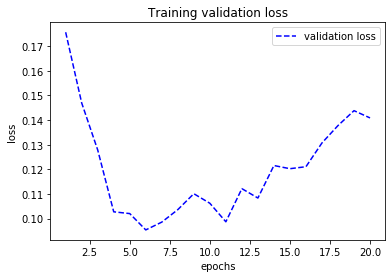

In [18]:
# Try increasing the depth of the model and use bigger layers
model = keras.Sequential([
    layers.Dense(96, activation = 'relu'),
    layers.Dense(96, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])
model.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_images, 
                     train_labels,
                     batch_size = 128,
                     epochs = 20,
                     validation_split = 0.2
                    )

validation_loss = history.history['val_loss']
epochs = range(1, len(validation_loss) + 1)
plt.plot(epochs, validation_loss, 'b--', label = 'validation loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Training validation loss")
plt.legend()
plt.show()